glucifer.pylab tutorial
=======================

The glucifer pylab module provides a matplotib _style_ interface to the glucifer visualisation tool. Users can now construct their visualisations directly in python, without utilising the XML front end. There are numerous benefits to this interface over the traditional XML interface:
* Much simpler path to visualisations.
* Better error tolerance, and more verbose where incorrect input has been used.
* Dynamic visualisation of live Underworld simulation. Modify your visualations without needing to re-run the entire simulation.
* Easily generate numerous visualisations simultaneously.
* Embedded documentation via python docstrings. 
* Embed your results directly in your ipython notebook

Note that only a subset of the glucifer functionality is currently supported.  All classes and functions have corresponding docstrings which are available via the python `help()` function.

In [1]:
# lets setup a basic underworld model before be proceed.
import underworld as uw
# lets also import pylab
import glucifer.pylab as plt

The Figure
----------
The figure is the basic container object for glucifer drawing objects. A figure can be generated by calling the `Figure` constructor:

In [2]:
newfigure = plt.Figure()

Figures remain active while they are in scope, or while some object retains a reference to them. 

Drawing Objects
---------------
Drawing objects are the items that are rendered within the figure. Currently supported drawing objects are `Suface()`, which renders the surface of some Underworld field (or Numpy array), `Points()` which may be used to render Underworld swarm objects, and `VectorArrows()` which draws vector arrows across a vector field (such as a VelocityField). See `help(Drawing)` for options applicable to all drawing objects. 

### Surface
This object will draw the desired faces of a scalar field. We add this drawing object to a figure object by using the Figure.Surface() method. Use the `field` argument to provide the textual name for the live Underworld scalar field. Check `help(Surface)` for the full options of the Surface drawing object.

In [3]:
# create an object
mesh = uw.mesh.FeMesh_Cartesian('Q1', (2,2), (0.,0.), (1.,1.))
fevar = uw.fevariable.FeVariable( mesh, 1 )
# init to something
fevar.data[:] = 0.
fevar.data[0] = 10.
fevar.data[4] = 30.
fevar.data[8] = 10.

In [4]:
fig = plt.Figure(edgecolour="black")
guy = fig.Surface(fevar, mesh, colours="red yellow green")

We can now display the figure inline within ipython using the `show()` method:

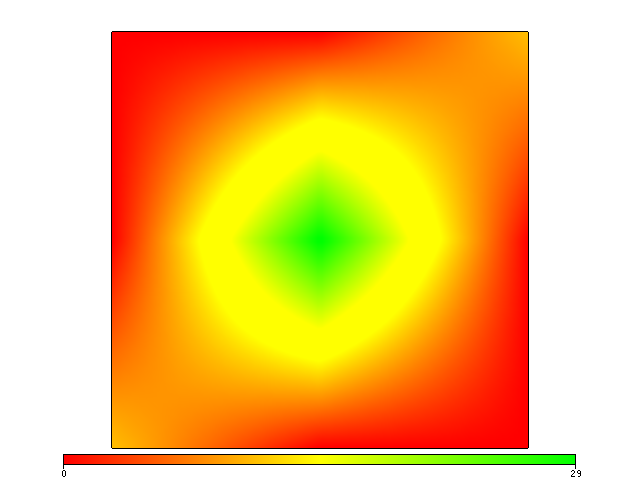

In [5]:
fig.show()

### VectorArrows
This object will draw an array of vector arrows across the image using the provided vector field to determine their direction. Similarly to the `Surface` drawing object, we can add this drawing object to a figure object by using the Figure.VectorArrows() method. Use the `field` argument to provide the textual name for the live Underworld vector field. Check `help(VectorArrows)` for the full options of the VectorArrows drawing object.

In [6]:
# create a new fevariable
fevarVec = uw.fevariable.FeVariable( mesh, 2 )
# init to something
fevarVec.data[:] = [ 0., 0.]
fevarVec.data[0] = [ 1., 1.]
fevarVec.data[1] = [ 0., 1.]
fevarVec.data[2] = [-1., 1.]
fevarVec.data[3] = [ 1., 0.]
fevarVec.data[5] = [-1., 0.]
fevarVec.data[6] = [ 1.,-1.]
fevarVec.data[7] = [ 0.,-1.]
fevarVec.data[8] = [-1.,-1.]

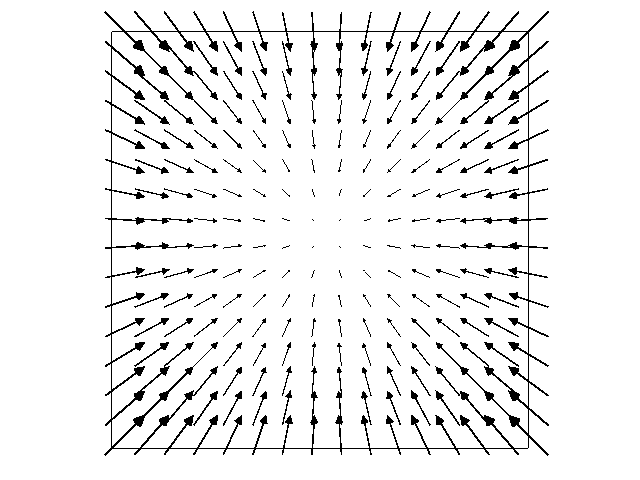

In [7]:
fig = plt.Figure(edgecolour="black")
fig.VectorArrows(fevarVec, mesh, lengthScale=0.1, arrowHeadSize=0.2)
fig.show()

### Points
This object will draw a swarm of points using the provided Underworld swarm for the point locations and an Underworld swarm variable for the point colours (or size or opacity). Similarly to the other drawing objects, we add this drawing object to a figure object by using the Figure.Points() method. Use the `swarm` argument to provide the textual name for the live Underworld vector field. Check `help(Points)` for the full options of the Points drawing object.

In [8]:
# add a swarm
swarmGuy = uw.swarm.Swarm(feMesh=mesh)
layout = uw.swarm.layouts.GlobalSpaceFillerLayout(swarm=swarmGuy,particlesPerCell=200)
swarmGuy.populate_using_layout(layout)

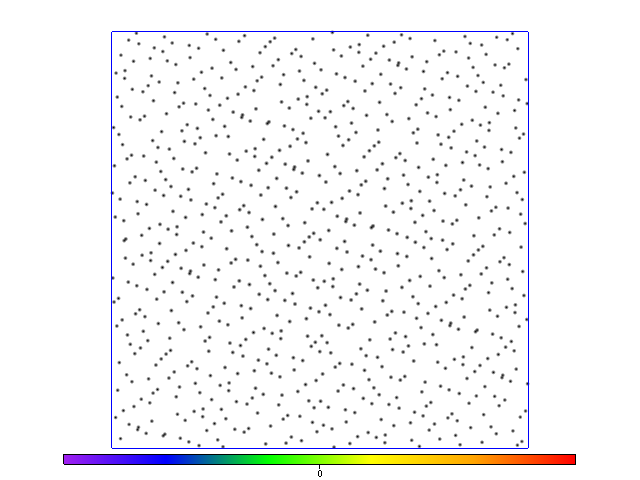

In [9]:
fig = plt.Figure(edgecolour="blue")
fig.Points(swarm=swarmGuy, pointSize=5)
fig.show()

And here we use a swarm variable to define the colour.

In [10]:
swarmVar = swarmGuy.add_variable("double",1)
swarmVar.data[:] = 0.
swarmVar.data[50:150] = 10.

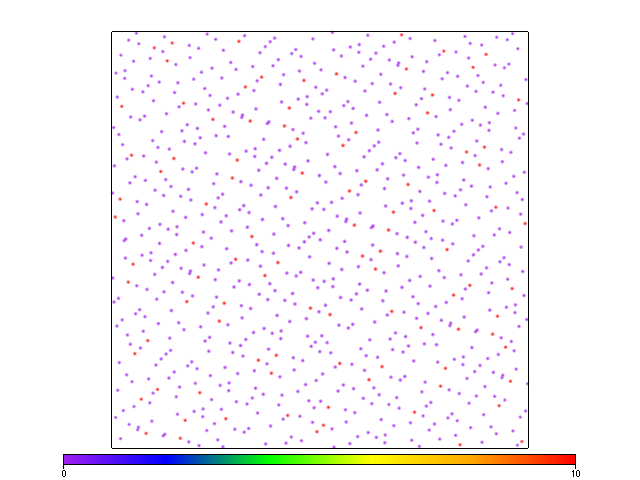

In [11]:
fig = plt.Figure(edgecolour="black")
fig.Points(swarm=swarmGuy, colourVariable=swarmVar, pointSize=5)
fig.show()

Image Layering
--------------
Multiple drawing objects can of course be layered upon each other to build up complex images. This is achieved by simply making multiple calls to your figure drawing object methods:

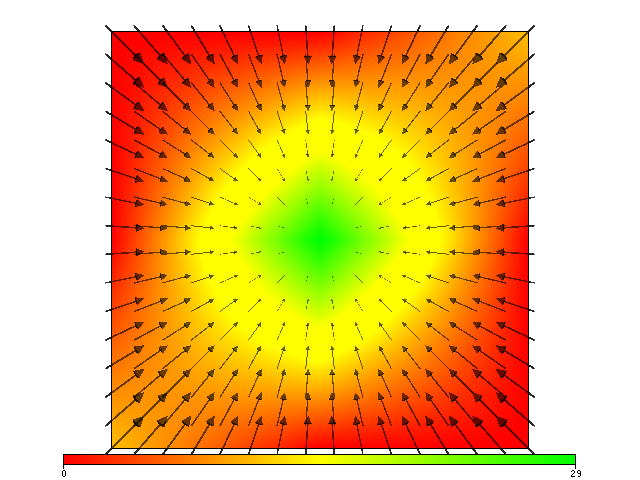

In [12]:
fig = plt.Figure(edgecolour="black")
fig.Surface(fevar, mesh, colours="red yellow green")
fig.VectorArrows(fevarVec, mesh, lengthScale=0.1, arrowHeadSize=0.2, opacity=0.6)
fig.show()

The `clear()` figure method can be used to clear all drawing objects from an active figure:

In [13]:
fig.clear()

Outputting
==========
To output results to raster files, simply use the `savefig()` method:

In [14]:
fig.Surface(fevar, mesh, colours="red yellow green")
fig.VectorArrows(fevarVec, mesh, lengthScale=0.1, arrowHeadSize=0.2, opacity=0.6)
figfile = "savedfigure.png"
fig.save_image(figfile)
import glob
import os
print glob.glob(figfile)

['savedfigure.png']


In [15]:
# Lets cleanup
os.remove(figfile)

Likewise, for those who wish to utilise the native viewer, the database object can be saved using the `saveDB()` method:

In [16]:
dbfile = "dbFile.sqlite3"
fig.save_database(dbfile)
print glob.glob(dbfile)

['dbFile.sqlite3']


In [17]:
# Lets cleanup
os.remove(dbfile)

Interactivity & Scripting
==========
An interactive viewer can be opened using the open_viewer() method:

In [18]:
fig = plt.Figure(edgecolour="black")
fig.Surface(fevar, mesh, colours="red yellow green")
fig.VectorArrows(fevarVec, mesh, lengthScale=0.1, arrowHeadSize=0.2, opacity=0.6)
fig.open_viewer()

Viewer opened: http://localhost:8080/


In [19]:
# Send a command:
fig.send_command('rotate y 45')

In [20]:
# close viewer 
fig.close_viewer()

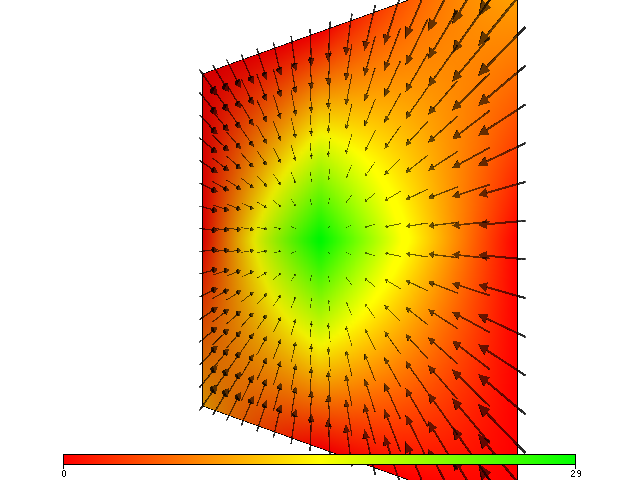

In [21]:
# add script
sc = fig.script('rotate y -45')
fig.show()